# Estimating continuous model from non-lattice discretised observations

We construct a discrete-time self-exciting process, which we hope will shed light on the behaviour of continuous-time processes.

We extend the method of Eichler et al (2016), which uses the the Berman-Turner device (1992) to approximate continuous-index point processes by discrete time autoregressive ones.
Parameters of interest:

- $\eta$, the continuous-time branching ratio
- $\phi(t,\tau)$ the influence kernel parameterised by $\tau$, I taken to be exponential, i.e.,  $\phi(t,\tau)=\tau^{-1}\mathbb{I}_{t>0}\exp t/\tau$
- $\mu$ the "background rate" is the endogenous process intensity.


## setup

In [1]:
import numpy as np
from importlib import reload
from scipy.stats import poisson, geom, expon
import pandas as pd


In [26]:
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Large graphs by default
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
% config InlineBackend.figure_format = 'svg'

## Basics

### Linear interpolation

In [27]:
from hawkes_process import design_nonlattice
design_nonlattice = reload(design_nonlattice)
obs_t = np.array([-5, 0, 5, 10,10.01, 10.02, 25,30,35,50, 52, 55], dtype='float')
cum_obs = np.array([1, 1, 1, 3, 4, 4, 5,7,9,11, 20, 21,], dtype='float')
basis_lag = np.array([0,2,4,6,8])
big_n_hat = design_nonlattice.linear_interp(obs_t, cum_obs, )


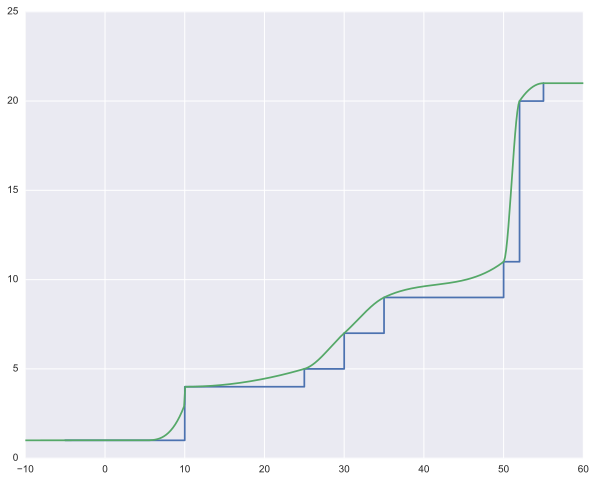

In [57]:
# quad_times = obs_t[:-1].reshape(1,-1) - basis_lag.reshape(-1,1)
# cum_endo = big_n_hat(quad_times)
eval_times = np.linspace(np.amin(obs_t) - 5, np.amax(obs_t) + 5, 500)
plt.plot(obs_t, cum_obs, drawstyle='steps-post');
plt.plot(eval_times, big_n_hat(eval_times));

In [58]:
from hawkes_process import design_nonlattice
design_nonlattice = reload(design_nonlattice)
big_n_hat = design_nonlattice.interpolate(obs_t, cum_obs)
p,r,w = design_nonlattice.design_stepwise(obs_t, cum_obs, basis_lag, big_n_hat)

### Cubic interpolation

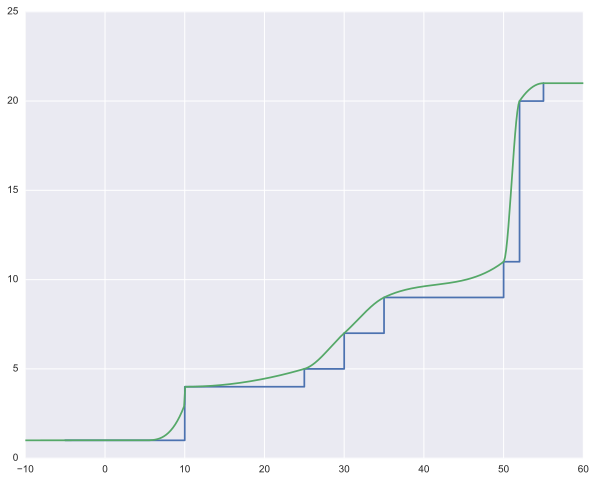

In [59]:
from hawkes_process import design_nonlattice
design_nonlattice = reload(design_nonlattice)
obs_t = np.array([-5, 0, 5, 10,10.01, 10.02, 25,30,35,50, 52, 55], dtype='float')
cum_obs = np.array([1, 1, 1, 3, 4, 4, 5,7,9,11, 20, 21,], dtype='float')
basis_lag = np.array([0,2,4,6,8])
big_n_hat = design_nonlattice.cubic_interp(obs_t, cum_obs, )
# quad_times = obs_t[:-1].reshape(1, -1) - basis_lag.reshape(-1,1)
# cum_endo = big_n_hat(quad_times)
eval_times = np.linspace(np.amin(obs_t) - 5, np.amax(obs_t) + 5, 500)
plt.plot(obs_t, cum_obs, drawstyle='steps-post');
plt.plot(eval_times, big_n_hat(eval_times));

In [60]:
from hawkes_process import design_nonlattice
design_nonlattice = reload(design_nonlattice)
big_n_hat = design_nonlattice.interpolate(obs_t, cum_obs, cum_interp='cubic')
p,r,w = design_nonlattice.design_stepwise(obs_t, cum_obs, basis_lag, big_n_hat)
p, r,w

(array([[-0.        , -0.        , -0.        , -0.        ],
        [-0.        , -0.        , -0.        , -0.        ],
        [-0.        , -0.        , -0.        , -0.        ],
        [ 1.55945569,  0.42264558,  0.01789874, -0.        ],
        [ 2.55510722,  0.4264759 ,  0.01841687, -0.        ],
        [ 2.55073024,  0.43032486,  0.0189449 , -0.        ],
        [ 0.24370338,  0.2111781 ,  0.1778702 ,  0.14377967],
        [ 0.92967076,  0.84322359,  0.35297408,  0.22753857],
        [ 0.66909091,  0.90181818,  0.8723145 ,  0.95128256],
        [ 0.55884412,  0.3545829 ,  0.21270011,  0.13319576],
        [ 9.        ,  0.55884412,  0.3545829 ,  0.21270011]]),
 array([  0.00000000e+00,   0.00000000e+00,   4.00000000e-01,
          1.00000000e+02,   0.00000000e+00,   6.67556742e-02,
          4.00000000e-01,   4.00000000e-01,   1.33333333e-01,
          4.50000000e+00,   3.33333333e-01]),
 array([  5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          1.00000000e-

In [61]:
from hawkes_process import weighted_linear_model
weighted_linear_model = reload(weighted_linear_model)

wlm = weighted_linear_model.WeightedLassoLarsIC()
wlm.fit(p, r, sample_weight=w, penalty_weight='adaptive')
wlm.coef_

array([[ 0.,  0.,  0.,  0.]])

### Iterative Dirac interpolation

In [71]:
from hawkes_process import design_nonlattice
design_nonlattice = reload(design_nonlattice)
obs_t = np.array([-5, 0, 5, 10,10.01, 10.02, 25,30,35,50, 52, 55], dtype='float')
cum_obs = np.array([1, 1, 1, 3, 4, 4, 5,7,9,11, 20, 21,], dtype='float')
basis_lag = np.array([0,2,4,6,8])
big_n_hat = design_nonlattice.dirac_interpolant_from_obs(obs_t, cum_obs, )
big_n_hat([-5.001, -5,  -4.999, 0, 4.5, 4.999, 5, 5.001, 9.999, 10, 10.001, 57])
# design_nonlattice.reweight_dirac_interpolant(big_n_hat, [0,2,4], np.ones(3)/3)


array([  1.,   1.,   1.,   1.,   3.,   3.,   3.,   3.,   5.,   5.,   5.,
        21.])

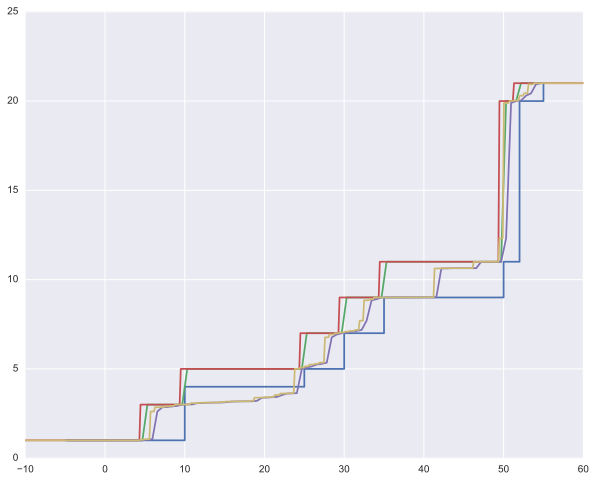

In [72]:
np.random.seed(1238)
eval_times = np.linspace(np.amin(obs_t) - 5, np.amax(obs_t) + 5, 500)

plt.plot(obs_t, cum_obs, drawstyle='steps-post');
big_n_hat = design_nonlattice.dirac_interpolant_from_obs(obs_t, cum_obs, )
plt.plot(big_n_hat.spike_t, big_n_hat.spike_cum_weight);
plt.plot(eval_times, big_n_hat(eval_times));
big_n_hat = design_nonlattice.dirac_interpolant_from_obs(obs_t, cum_obs, strategy='random')
plt.plot(big_n_hat.spike_t, big_n_hat.spike_cum_weight);
plt.plot(eval_times, big_n_hat(eval_times));
# big_n_hat = design_nonlattice.dirac_interpolant_from_obs(obs_t, cum_obs, strategy='spike')
# plt.plot(big_n_hat.spike_t, big_n_hat.spike_cum_weight);
# plt.plot(eval_times, big_n_hat(eval_times));


## Ground-truth values

In [73]:
import numpy.random
numpy.random.seed(1238)

In [74]:
tau = 5.0
phi = lambda t: expon(scale=tau).pdf(t)
mu=9.0
eta=0.9
start=0.0
end=300

In [75]:
from hawkes_process import sim_nonlattice
from hawkes_process import sim_cts
from hawkes_process import convert
from hawkes_process import plots
sim_nonlattice = reload(sim_nonlattice)
convert = reload(convert)
plots = reload(plots)
sim_cts = reload(sim_cts)

timestamps = np.sort(sim_cts.sim_hawkes(phi=phi, mu=mu, eta=eta, start=start, end=end));
plots.rug(timestamps, ms=100);
evalpts = np.linspace(start, end, 5000)

true_intensity = sim_cts.intensity_hawkes(timestamps, phi=phi, mu=mu, eta=eta, eval_timestamps=evalpts)
plt.plot(evalpts, true_intensity)

eq_obs_times, eq_cum_counts = sim_nonlattice.quantize_timestamps(timestamps)
eq_obs_times, eq_rates = convert.cumulative_counts_as_rates(eq_obs_times, eq_cum_counts)
plots.piecewise(eq_obs_times, eq_rates);

obs_t, cum_obs = sim_nonlattice.quantize_timestamps(timestamps, obs_t='poisson')
obs_t, rates = convert.cumulative_counts_as_rates(obs_t, cum_obs);
plots.piecewise(obs_t, rates);

top = np.maximum(np.amax(eq_rates), np.amax(rates))

plt.gca().set_ylim(bottom=0, top=top)
plt.gca().set_xlim(left=start, right=end);

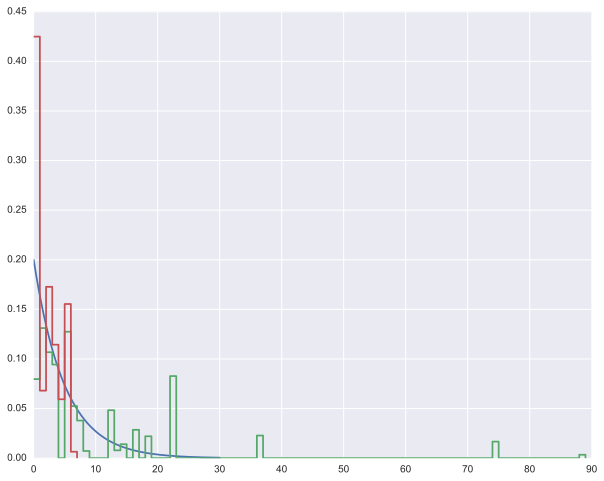

In [76]:
from hawkes_process import fit_nonlattice
from hawkes_process import weighted_linear_model
sim_nonlattice = reload(fit_nonlattice)
weighted_linear_model = reload(weighted_linear_model)

model = fit_nonlattice.NonLatticeOneShot(
    fit_intercept=True,
    wlm_factory='WeightedLassoLarsCV',
    cum_interp='cubic'
)
model.fit(obs_t, cum_obs)

eq_model = fit_nonlattice.NonLatticeOneShot(
    fit_intercept=True,
    wlm_factory='WeightedLassoLarsCV',
    cum_interp='cubic'
)
eq_model.fit(eq_obs_times, eq_cum_counts)

plots = reload(plots)

plt.figure();
phi_evalpts = np.linspace(0, 30, 300);
phi_eval =  phi(phi_evalpts);
plt.plot(phi_evalpts, phi_eval);
plots.phi_hat_plot(eq_model);
plots.phi_hat_plot(model);


(1.1452820805545758, 1.1264000193242225)

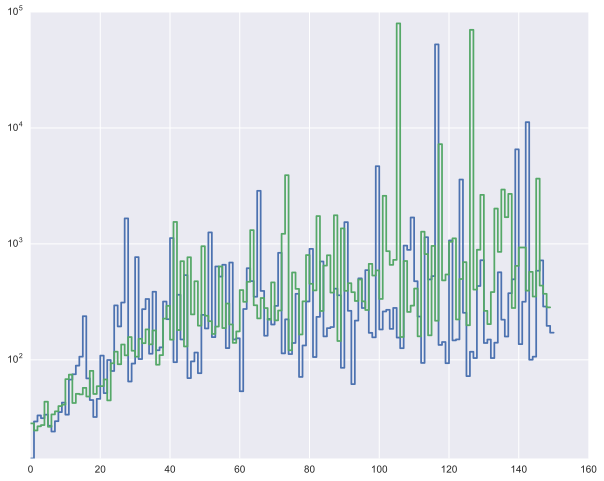

In [77]:
plots=reload(plots)
plots.phi_weight_plot(model=model);
plots.phi_weight_plot(model=eq_model);
model.wlm.alpha_, model.wlm.intercept_

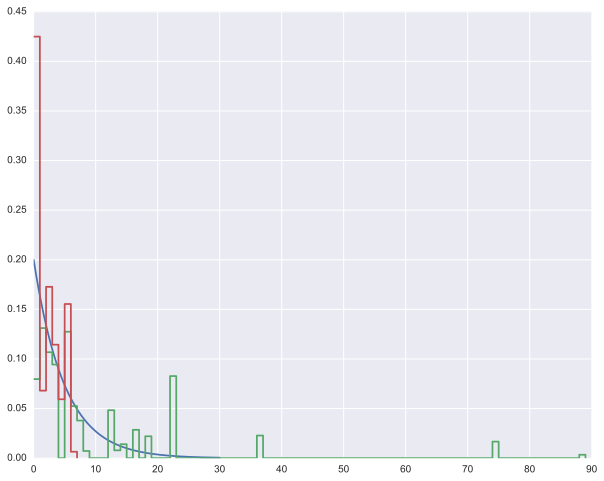

In [49]:
from hawkes_process import fit_nonlattice
from hawkes_process import weighted_linear_model
sim_nonlattice = reload(fit_nonlattice)
weighted_linear_model = reload(weighted_linear_model)

model = fit_nonlattice.NonLatticeOneShot(
    fit_intercept=True,
    wlm_factory='WeightedLassoLarsCV',
    cum_interp='cubic'
)
model.fit(obs_t, cum_obs, penalty_weight='adaptive')

eq_model = fit_nonlattice.NonLatticeOneShot(
    fit_intercept=True,
    wlm_factory='WeightedLassoLarsCV',
    cum_interp='cubic'
)
eq_model.fit(eq_obs_times, eq_cum_counts, penalty_weight='adaptive')

plots = reload(plots)

phi_evalpts = np.linspace(0, 30, 300)
phi_eval =  phi(phi_evalpts)
plt.plot(phi_evalpts, phi_eval);
plots.phi_hat_plot(eq_model);
plots.phi_hat_plot(model);


In [ ]:
from hawkes_process import fit_nonlattice
from hawkes_process import weighted_linear_model
sim_nonlattice = reload(fit_nonlattice)
weighted_linear_model = reload(weighted_linear_model)

model = fit_nonlattice.NonLatticeOneShot(
    criterion='bic',
    wlm_factory='WeightedLassoLarsIC',
)
model.fit(obs_t, cum_obs, sample_weight='equal')

eq_model = fit_nonlattice.NonLatticeOneShot(
    criterion='bic',
    wlm_factory='WeightedLassoLarsIC',
)
eq_model.fit(eq_obs_times, eq_cum_counts, sample_weight='equal')

plots = reload(plots)

plt.plot(evalpts, true_intensity);
plots.piecewise(*eq_model.predict(eq_obs_times, eq_cum_counts));
plots.piecewise(*model.predict(obs_t, cum_obs));

plt.figure();
phi_evalpts = np.linspace(0, 30, 300)
phi_eval =  phi(phi_evalpts)
plt.plot(phi_evalpts, phi_eval);
plots.phi_hat_plot(eq_model);
plots.phi_hat_plot(model);


## Load simulations

### First parse data from disk

In [ ]:
#load lists of dicts of lists and process into DataFrame
def load_trimmed(path, model, tau):
    ests = loadobj(path)
    for d in ests:
        del d['phi']
        del d['weight']
    df = pd.DataFrame(ests)
    df['real_tau'] = float(tau)
    df['conditional'] = model
    df['mu_ratio'] = df['mu']/real_mu
    df['kappa_ratio'] = df['kappa']/real_eta_prime
    df['tau_ratio'] = df['tau']/df['real_tau']
    if 'eta' in df:
        df['eta_prime_ratio'] = df['kappa']/(1.0-df['eta'])/real_eta_prime
    else:
        df['eta_prime_ratio'] = df['kappa']/real_eta_prime
    return df

df = pd.concat([
    load_trimmed(path, model, tau) for path, model, tau in (
        ('poisson_fit__tau_01', 'poisson', 1.0),
        ('poisson_fit__tau_05', 'poisson', 5.0),
        ('poisson_fit__tau_40', 'poisson', 40.0),
        ('gpd_fit__tau_01', 'gpd', 1.0),
        ('gpd_fit__tau_05', 'gpd', 5.0),
        ('gpd_fit__tau_40', 'gpd', 40.0),
    )
])

## Plotted results

For now, I only try *two* alternative models, depending on the conditional distribution used in the discrete regression. where I have a Poisson conditional distribution (`poisson`), and an 'overdispersed' Generalised Poisson Distribution (`gpd`), where we may choose to interpret overdispersion as evidence of endogenous self-excitation.
Many other alternatives are available.

Intuitively, the longer the kernel (and the bigger $\tau$) the closer we expect the discretised model to be to the continuous time model, and the closer we hope our estimates to converge.

Therefore we also vary $\tau$, choosing a true value of $\tau\in\{1,5,40\}$.

For ease of visual comparison, I plot the *ratio* of estimated to true value.

### $\hat{\bar{\mu}}$, background rate estimate

As expected, for large $\tau$, the discretized estimate is quite good, although the Poisson marginal performs poorly as $\tau$ shrinks towards the bin size, the estimate is reasonably good for both conditional distributions.



In [ ]:
sns.violinplot(x='real_tau', y='mu_ratio', hue='conditional', data=df);
plt.title('Cts $\\hat{\\mu}/\\mu$ (background rate) estimated from discrete regression, ' 
          '$T_{end}=300.0, \\Delta T=1.0$');
plt.hlines(y=1.0, xmin=-1, xmax=3, linestyles=":", colors='red');

### $\hat{\bar{\tau}}$, influence kernel length

The quality of this estimator decreases much more rapidly with decreasing $\tau$ but performs well for larger values; conditional model makes little difference here.

In [ ]:
sns.violinplot(x='real_tau', y='tau_ratio', hue='conditional', data=df);
plt.title('Cts $\\hat{\\tau}/\\tau$ (kernel length) estimated from discrete regression, ' 
          '$T_{end}=300.0, \\Delta T=1.0$');
plt.hlines(y=1.0, xmin=-1, xmax=3, linestyles=":", colors='red');
plt.gca().set_ylim(0,6);

### $\hat{\bar{\eta}}$, uncorrected branching ratio estimate

We can interpret the $\eta$ directly as a branching ratio estimate;
we expect this to perform poorly with the Generalised Poisson conditional distribution, which will "absorb" some branching into the over-dispersion parameter.

Indeed, this is the case.

In [ ]:
sns.violinplot(x='real_tau', y='kappa_ratio', hue='conditional', data=df);
plt.title('Cts $\\hat{\\kappa}/\\kappa$ (slow branching ratio) estimated from discrete regression, ' 
          '$T_{end}=300.0, \\Delta T=1.0$');
plt.hlines(y=1.0, xmin=-1, xmax=3, linestyles=":", colors='red');

### $\hat{\bar{\eta^*}}$, the "corrected" branching ratio estimate

For the Generalised Poisson distribution we can correct the branching ratio estimate by the over-dispersion parameters to see if this de-biases the estimate. Indeed it does, but the performance is not substantially better than for the poisson marginal.

In [ ]:
sns.violinplot(x='real_tau', y='eta_prime_ratio', hue='conditional', data=df);
plt.title('Cts $\\hat{\\eta}^*/\\eta$ (corrected branching ratio) estimated from discrete regression, ' 
          '$T_{end}=300.0, \\Delta T=1.0$');
plt.hlines(y=1.0, xmin=-1, xmax=3, linestyles=":", colors='red');

## Performance issues

Whilst this estimator is not yet spectacular in accuracy, it is worth considering the performance tradeoff for such an estimate.

How long was the median time taken to fit each model, typically?


In [41]:
print(df['time'].median(), 'seconds')

NameError: name 'df' is not defined

How many events were in each time series typically?

In [42]:
print(df['n'].median(), 'events')

NameError: name 'df' is not defined